In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

helper function

In [174]:
def validation_curves(estimator, title, X, y,
                      cv= None, param_name= None, param_range=None, x_axis=None):
    if not x_axis:
        x_axis = param_range
    train_scores, test_scores = validation_curve(
        estimator, X, y, cv = cv, 
        param_name = param_name, param_range = param_range, scoring='f1_micro')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1) 

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.plot(x_axis, train_scores_mean, label="Training score")
    plt.plot(x_axis, test_scores_mean, label="Cross-validation score")
    plt.legend()
    plt.show()

In [16]:
def learning_curves(estimator, title, x, y, cv, hospital=False):
    train_sizes, train_scores, test_scores, fit_time, predict_time = learning_curve(
            estimator, x, y, train_sizes=[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], cv=cv, scoring='f1_micro', return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    
    test_scores_mean = np.mean(test_scores, axis=1) 
    print('train_score', train_scores_mean[-1])
    print('testing_score', test_scores_mean[-1])
    fit_time_mean = np.mean(fit_time, axis=1)
    predict_time_mean = np.mean(predict_time, axis=1)
    if hospital:
        print('train_time', fit_time_mean[0])
        print('testing_time', predict_time_mean[0])
    else:
        print('train_time', fit_time_mean[-1])
        print('testing_time', predict_time_mean[-1])
    
    figure, axis = plt.subplots(2, 1)
    axis[0].set_ylim(0, 1.2)
    axis[0].plot(train_sizes, train_scores_mean, label='Training Accuracy')
    axis[0].plot(train_sizes, test_scores_mean, label='Testing Accuracy')
    axis[0].set_xlabel("Training Data Size", fontsize = 10)
    axis[0].set_ylabel("Training/Testing Accuracy", fontsize = 10)
    axis[0].tick_params(axis='x',labelsize=6)
    axis[0].tick_params(axis='y',labelsize=6)
    axis[0].set_title(title + "Training/Testing Accuracy VS Training Size", fontsize = 10)
    axis[0].legend()
    # For Cosine Function
    axis[1].plot(train_sizes, fit_time_mean, label='Train Time')
    axis[1].plot(train_sizes, predict_time_mean, label='Predict Time')
    axis[1].set_xlabel("Training Data Size", fontsize = 10)
    axis[1].set_ylabel("Training/Predict Time", fontsize = 10)
    axis[1].set_title(title + "Train/Predict Time vs Training Size", fontsize = 10)
    figure.tight_layout()
    axis[1].legend()
    plt.show()

Data Preprocess

In [40]:
hospital = pd.read_csv('medical.csv')
hospital['SEX'] = hospital['SEX'].replace({'F':0,'M':1})
hospital['SOURCE'] = hospital['SOURCE'].replace({'in':0,'out':1})
hospital_y = hospital['SOURCE']
hospital_x = hospital.drop('SOURCE',axis = 1)
X_train_hospital, X_test_hospital, y_train_hospital, y_test_hospital = train_test_split(
    hospital_x, hospital_y, test_size = 0.20)

iris = pd.read_csv('iris.csv')
le = LabelEncoder()
iris['Species'] = le.fit_transform(iris['Species'])

iris_y = iris['Species'].values
iris_x = iris.drop(['Species', 'Id'],axis = 1).values
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    iris_x, iris_y, test_size = 0.20, random_state = 0)

In [304]:
for i in iris.drop(['Species', 'Id'],axis = 1).columns:
    print(i)
    print(iris[i].corr(iris['Species']))

SepalLengthCm
0.7825612318100814
SepalWidthCm
-0.41944620026002755
PetalLengthCm
0.9490425448523333
PetalWidthCm
0.9564638238016173


Cross Validation shows more realistic estimation of model performance.

In [206]:
knn = KNeighborsClassifier()
knn.fit(X_train_hospital, y_train_hospital)
y_pred_test = knn.predict(X_test_hospital)
print(f1_score(y_test_hospital, y_pred_test, average='micro'))
scores = cross_val_score(KNeighborsClassifier(), hospital_x, hospital_y, cv=KFold(n_splits=5), scoring='f1_micro').mean()
print(scores)

0.6840317100792752
0.6853830093758908


In [71]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train_hospital, y_train_hospital)
y_pred_test = dt.predict(X_test_hospital)
print(f1_score(y_test_hospital, y_pred_test, average='micro'))
scores = cross_val_score(tree.DecisionTreeClassifier(criterion='entropy'), hospital_x, hospital_y, cv=KFold(n_splits=5), scoring='f1_micro').mean()
print(scores)

0.6477916194790487
0.6409632180543037


In [208]:
knn = KNeighborsClassifier()
knn.fit(X_train_iris, y_train_iris)
y_pred_test = knn.predict(X_test_iris)
print(f1_score(y_test_iris, y_pred_test, average='micro'))
scores = cross_val_score(KNeighborsClassifier(), iris_x, iris_y, cv=KFold(n_splits=5), scoring='f1_micro')
print(scores)

0.9666666666666667
[1.         1.         0.83333333 0.93333333 0.8       ]


In [209]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train_iris, y_train_iris)
y_pred_test = knn.predict(X_test_iris)
print(f1_score(y_test_iris, y_pred_test, average='micro'))
scores = cross_val_score(tree.DecisionTreeClassifier(criterion='entropy'), iris_x, iris_y, cv=KFold(n_splits=5), scoring='f1_micro')
print(scores)

0.9666666666666667
[1.         0.96666667 0.9        0.93333333 0.76666667]


From the above examples, we find that cross validation is more reliable and shows a more realistic picture of our model performance

KNN

In [8]:
from sklearn.model_selection import GridSearchCV

In [21]:
knn = KNeighborsClassifier()

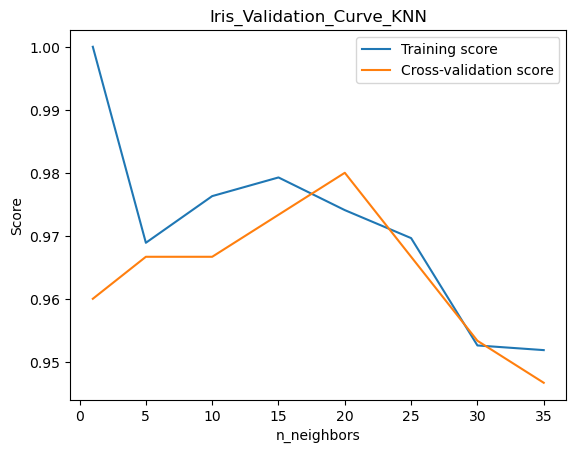

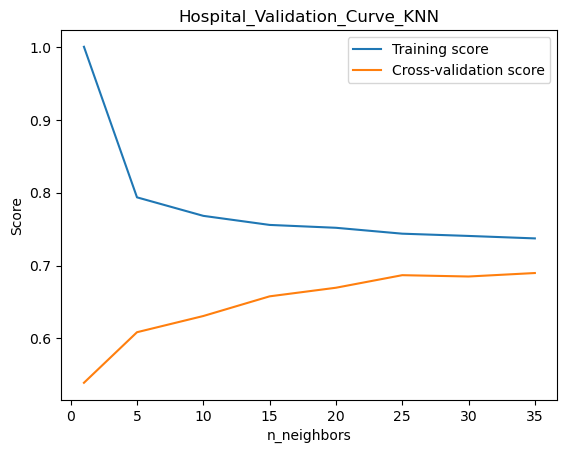

In [75]:
validation_curves(knn, 'Iris_Validation_Curve_KNN', iris_x, iris_y, 10, 'n_neighbors', 
                 [1, 5, 10, 15, 20, 25, 30, 35])
validation_curves(knn, 'Hospital_Validation_Curve_KNN', hospital_x, hospital_y, 10, 'n_neighbors', 
                 [1, 5, 10, 15, 20, 25, 30, 35])

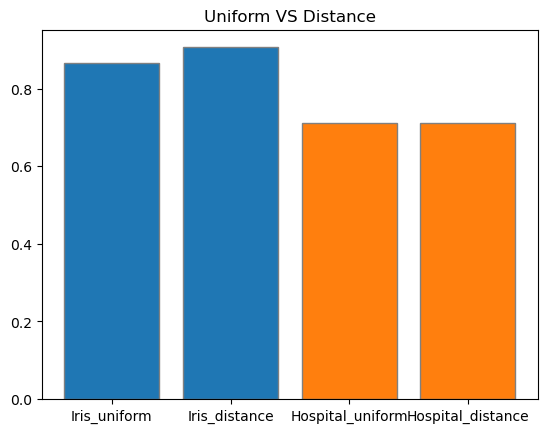

In [229]:
f1_scores = []
plt.title("Uniform VS Distance")
for w in ['uniform','distance']:
    knn = KNeighborsClassifier(weights=w, n_neighbors=20) 
    f1_scores.append(cross_val_score(knn, iris_x, iris_y, cv=KFold(n_splits=5), scoring='f1_micro').mean())

plt.bar(['Iris_uniform','Iris_distance'], f1_scores, edgecolor ='grey', label ='Iris')
    
f1_scores = []
for w in ['uniform','distance']:
    knn = KNeighborsClassifier(weights=w, n_neighbors=35) 
    f1_scores.append(cross_val_score(knn, hospital_x, hospital_y, cv=KFold(n_splits=5), scoring='f1_micro').mean())
    
plt.bar(['Hospital_uniform','Hospital_distance'], f1_scores, edgecolor ='grey', label ='Hospital')
plt.show()

0.9800000000000001
KNeighborsClassifier(n_neighbors=15, weights='distance')
train_score 1.0
testing_score 0.9733333333333334
train_time 0.00015635490417480468
testing_time 0.00045037269592285156


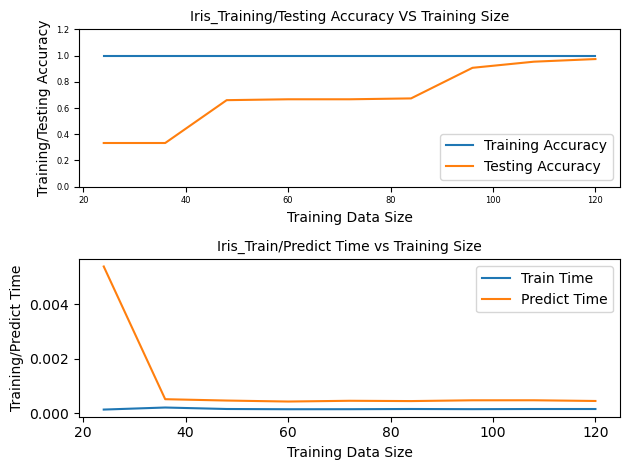

In [225]:
knn = KNeighborsClassifier()
parameters = {
    'n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40, 45],
    'weights' : ['uniform','distance']
    
}
grid = GridSearchCV(knn, parameters, cv=10, scoring='f1_micro', return_train_score=False)
grid.fit(iris_x, iris_y)
print(grid.best_score_)
print(grid.best_estimator_)

learning_curves(grid.best_estimator_, 'Iris_', iris_x, iris_y, cv=5)

0.6794893721928184
KNeighborsClassifier(n_neighbors=35)
train_score 0.7389628790025503
testing_score 0.6794893721928184
train_time 0.000845956802368164
testing_time 0.011089420318603516


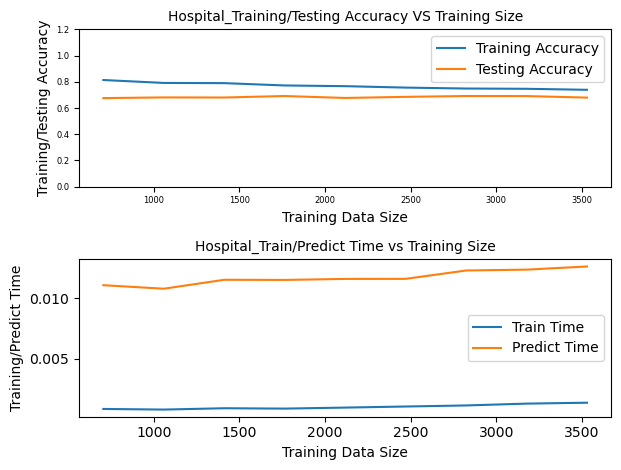

In [226]:
knn = KNeighborsClassifier()
parameters = {
    'n_neighbors': [5, 10, 15, 20, 25, 30, 35],
    'weights' : ['uniform','distance']
    
}
grid = GridSearchCV(knn, parameters, cv=5, scoring='f1_micro', return_train_score=False)
grid.fit(hospital_x, hospital_y)
print(grid.best_score_)
print(grid.best_estimator_)
learning_curves(grid.best_estimator_, 'Hospital_', hospital_x, hospital_y, cv=5, hospital=True)

Decision Tree --Entropy

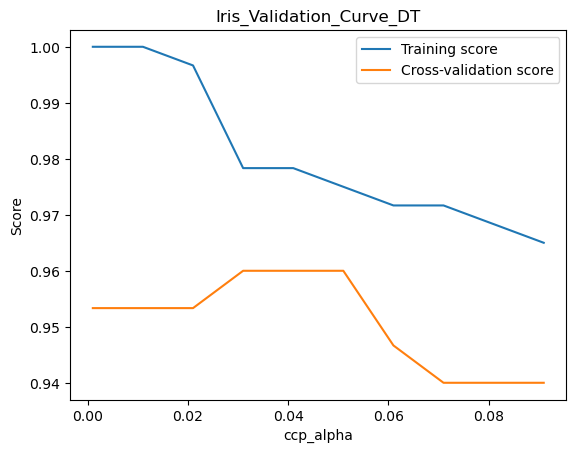

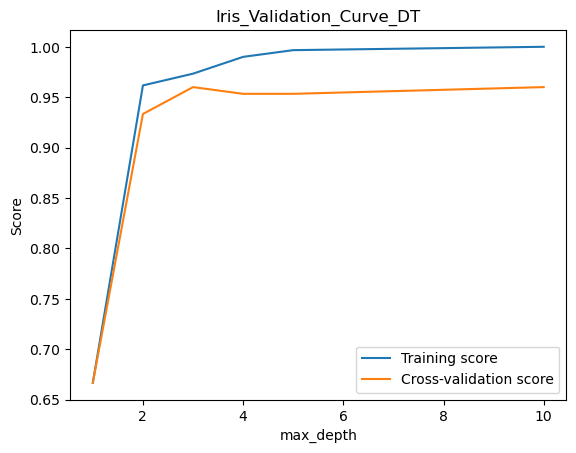

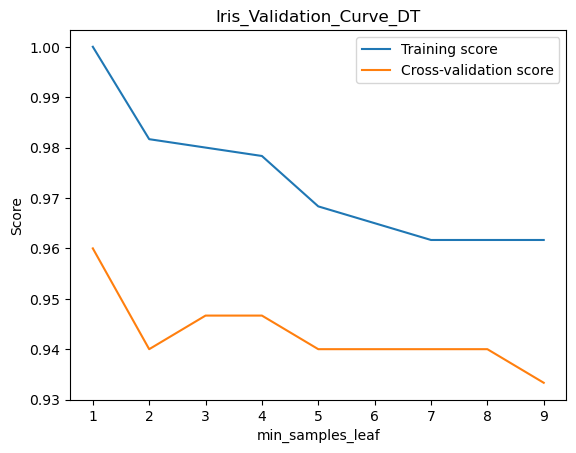

In [234]:
validation_curves(dt, 'Iris_Validation_Curve_DT', iris_x, iris_y, 5, 'ccp_alpha', 
                 np.array(range(1, 100, 10)) * 0.001)
validation_curves(dt, 'Iris_Validation_Curve_DT', iris_x, iris_y, 5, 'max_depth', 
                 [1,2, 3,4,5, 10])
validation_curves(dt, 'Iris_Validation_Curve_DT', iris_x, iris_y, 5, 'min_samples_leaf', 
                 range(1, 10))

In [276]:
dt = tree.DecisionTreeClassifier()
parameters = {
    'max_depth': range(1, 5),
    'min_samples_leaf': range(3, 10),
    'ccp_alpha': np.array(range(1, 60, 10)) * 0.001
}
grid = GridSearchCV(dt, parameters, cv=5, scoring='f1_micro', return_train_score=False)
grid.fit(iris_x, iris_y)
print(grid.best_score_)
print(grid.best_estimator_)

0.96
DecisionTreeClassifier(ccp_alpha=0.001, max_depth=3, min_samples_leaf=4)


train_score 0.9716666666666667
testing_score 0.9466666666666667
train_time 0.0003004550933837891
testing_time 0.0003681659698486328


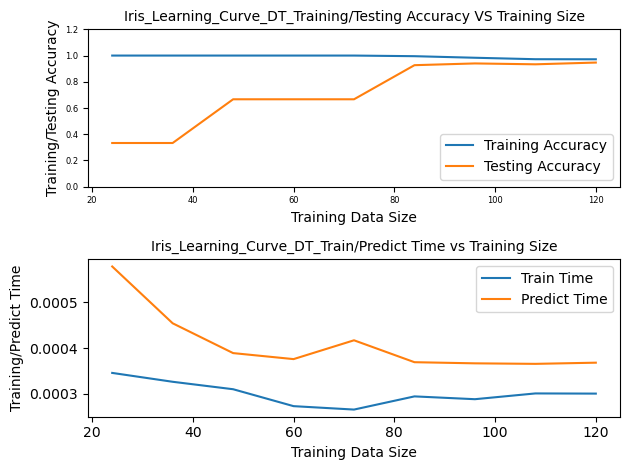

In [277]:
learning_curves(grid.best_estimator_, 'Iris_Learning_Curve_DT_', iris_x, iris_y, cv=5)

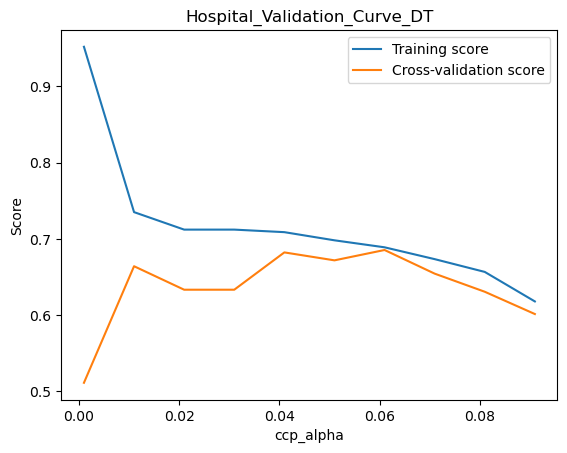

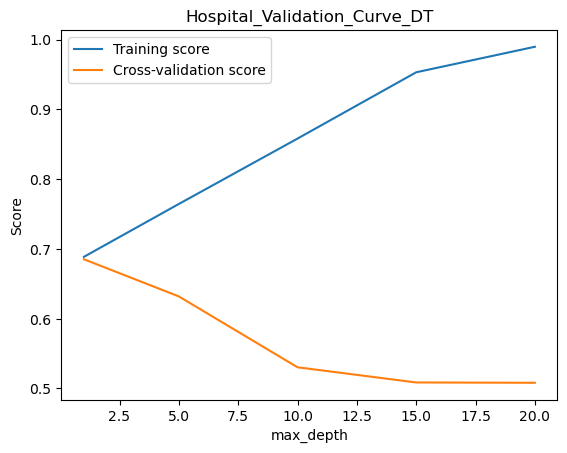

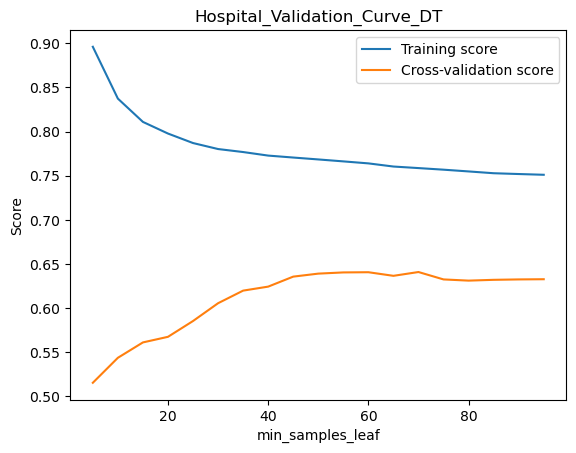

In [235]:
validation_curves(dt, 'Hospital_Validation_Curve_DT', hospital_x, hospital_y, 5, 'ccp_alpha', 
                 np.array(range(1, 100, 10)) * 0.001)
validation_curves(dt, 'Hospital_Validation_Curve_DT',hospital_x, hospital_y, 5, 'max_depth', 
                 [1, 5, 10, 15, 20])
validation_curves(dt, 'Hospital_Validation_Curve_DT', hospital_x, hospital_y, 5, 'min_samples_leaf', 
                 range(5, 100,5))

In [242]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
parameters = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': range(5, 100,5),
    'ccp_alpha': np.array(range(1, 100, 10)) * 0.001
}
grid = GridSearchCV(dt, parameters, cv=5, scoring='f1_micro', return_train_score=False)
grid.fit(hospital_x, hospital_y)
print(grid.best_score_)
print(grid.best_estimator_)

0.685155224792824
DecisionTreeClassifier(ccp_alpha=0.061, criterion='entropy', max_depth=5,
                       min_samples_leaf=5)


train_score 0.6886936809294417
testing_score 0.685155224792824
train_time 0.0020795345306396486
testing_time 0.0007894515991210937


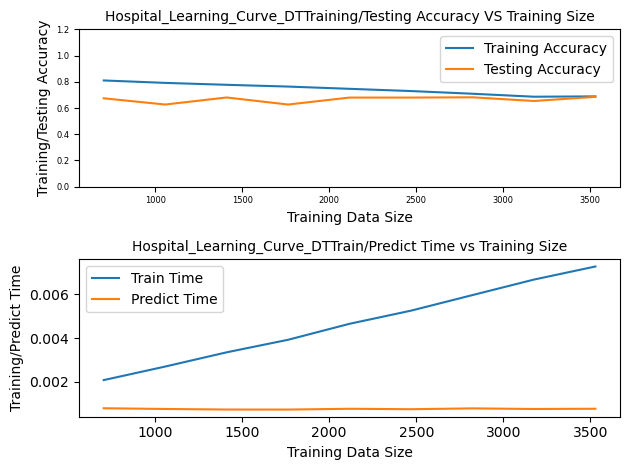

In [244]:
learning_curves(grid.best_estimator_, 'Hospital_Learning_Curve_DT', hospital_x, hospital_y, cv=5, hospital=True)

Boosting

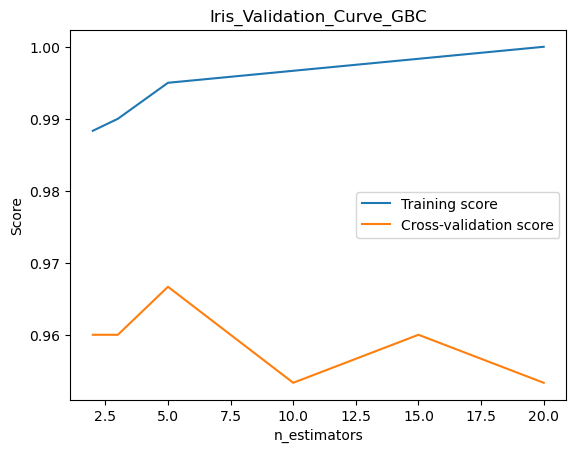

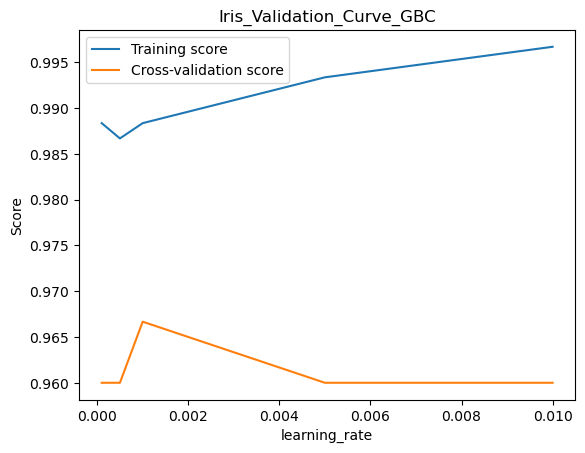

In [249]:
gbc = GradientBoostingClassifier()
validation_curves(gbc, 'Iris_Validation_Curve_GBC', iris_x, iris_y, 5, 'n_estimators', 
                 [2, 3, 5, 10, 15, 20])
validation_curves(gbc, 'Iris_Validation_Curve_GBC', iris_x, iris_y, 5, 'learning_rate',
                 [0.0001, 0.0005, 0.001, 0.005, 0.01])

0.9466666666666667
GradientBoostingClassifier(ccp_alpha=0.011, learning_rate=0.001, max_depth=10,
                           n_estimators=3)
train_score 0.9716666666666667
testing_score 0.9466666666666667
train_time 0.0023525238037109377
testing_time 0.00033884048461914064


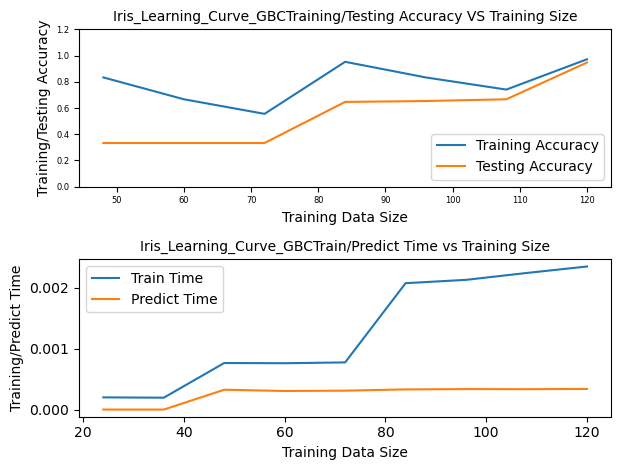

In [255]:
gbc = GradientBoostingClassifier(ccp_alpha=0.011, max_depth=10, min_samples_leaf=1)
parameters = {
    'n_estimators': [3, 5, 10, 15],
    'learning_rate': [0.001, 0.0015, 0.002, 0.003, 0.005]
}
grid = GridSearchCV(gbc, parameters, cv=5, scoring='f1_micro', return_train_score=False)
grid.fit(iris_x, iris_y)
print(grid.best_score_)
print(grid.best_estimator_)
learning_curves(grid.best_estimator_, 'Iris_Learning_Curve_GBC', iris_x, iris_y, cv=5)

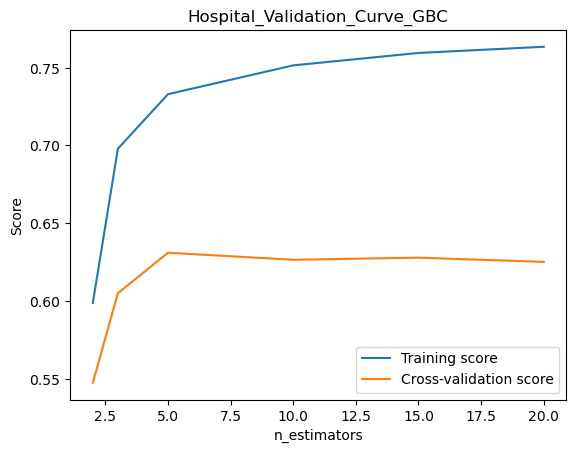

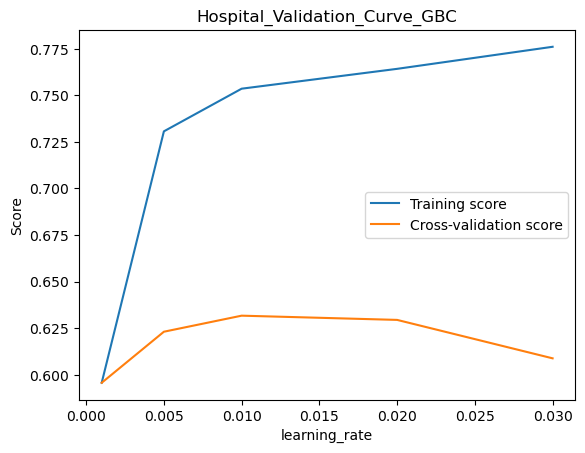

In [247]:
gbc = GradientBoostingClassifier()
validation_curves(gbc, 'Hospital_Validation_Curve_GBC', hospital_x, hospital_y, 5, 'n_estimators', 
                 [2, 3, 5, 10, 15, 20])
validation_curves(gbc, 'Hospital_Validation_Curve_GBC', hospital_x, hospital_y, 5, 'learning_rate',
                 [0.001, 0.005, 0.01, 0.02, 0.03])

0.5956482102089609
GradientBoostingClassifier(learning_rate=0.001, n_estimators=3)
train_score 0.5956361575517144
testing_score 0.5956482102089609
train_time 0.012787485122680664
testing_time 0.000836038589477539


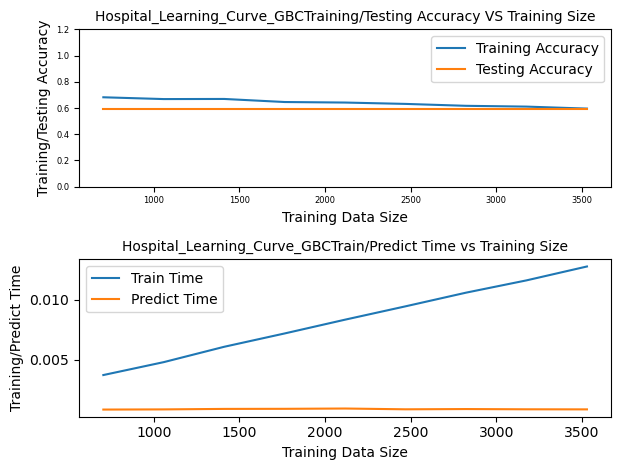

In [254]:
gbc = GradientBoostingClassifier()
parameters = {
    'n_estimators': [3, 5, 7, 10],
    'learning_rate': [0.001, 0.005, 0.01, 0.015]
}
grid = GridSearchCV(gbc, parameters, cv=5, scoring='f1_micro', return_train_score=False)
grid.fit(hospital_x, hospital_y)
print(grid.best_score_)
print(grid.best_estimator_)
learning_curves(grid.best_estimator_, 'Hospital_Learning_Curve_GBC', hospital_x, hospital_y, cv=5)

NN

/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib

/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib

/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib

/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib

/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib

/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib

/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib

/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib

/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib

/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib

/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib

/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib

/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib

/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib

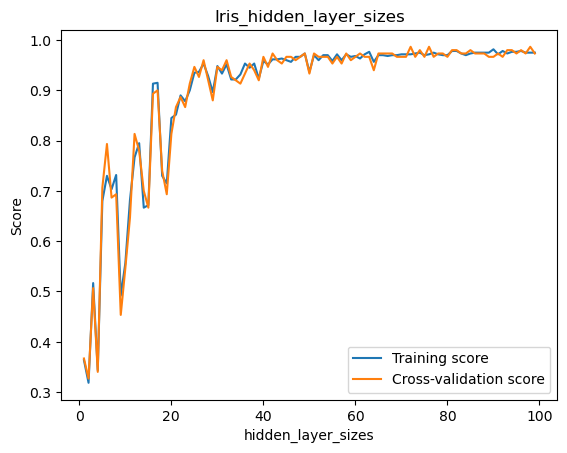

In [292]:
clf = MLPClassifier()
validation_curves(clf , 'Iris_hidden_layer_sizes', iris_x, iris_y, 5, 'hidden_layer_sizes', 
                 range(1, 100))
validation_curves(clf , 'Hospital_hidden_layer_sizes', hospital_x, hospital_y, 5, 'hidden_layer_sizes', 
                 range(10, 100, 10))

/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib

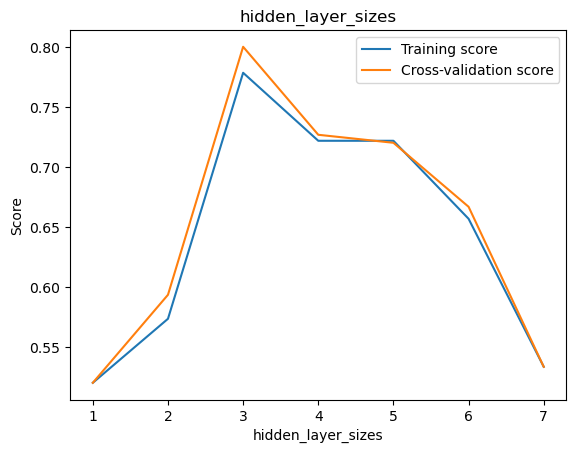

In [295]:
clf = MLPClassifier()
validation_curves(clf , 'hidden_layer_sizes', iris_x, iris_y, 5, 'hidden_layer_sizes', 
                 [[5]*1, [5]*2, [5]*3, [5]*4, [5]*5, [5]*6, [5]*7], x_axis=[1, 2, 3,4,5,6,7])

/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib

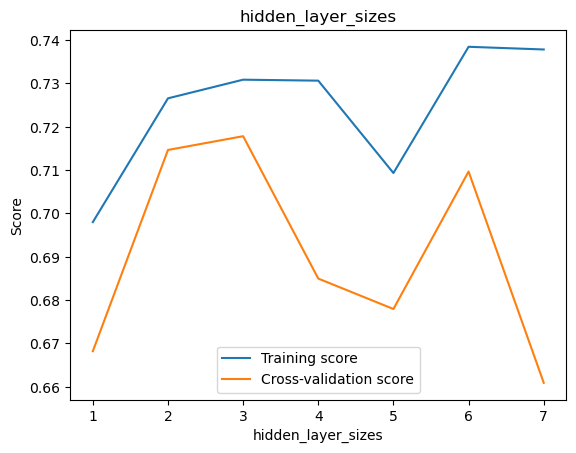

In [296]:
clf = MLPClassifier()
validation_curves(clf , 'hidden_layer_sizes', hospital_x, hospital_y, 5, 'hidden_layer_sizes', 
                 [[5]*1, [5]*2, [5]*3, [5]*4, [5]*5, [5]*6, [5]*7], x_axis=[1, 2, 3,4,5,6,7])

/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib

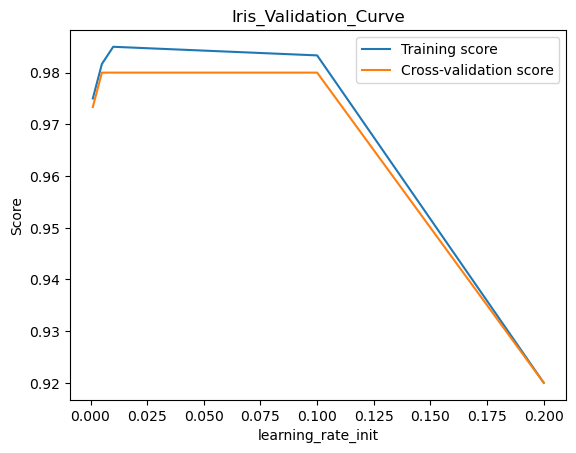

In [297]:
clf = MLPClassifier()
validation_curves(clf , 'Iris_Validation_Curve', iris_x, iris_y, 5, 'learning_rate_init', 
                 [0.001, 0.005, 0.01, 0.1, 0.2])

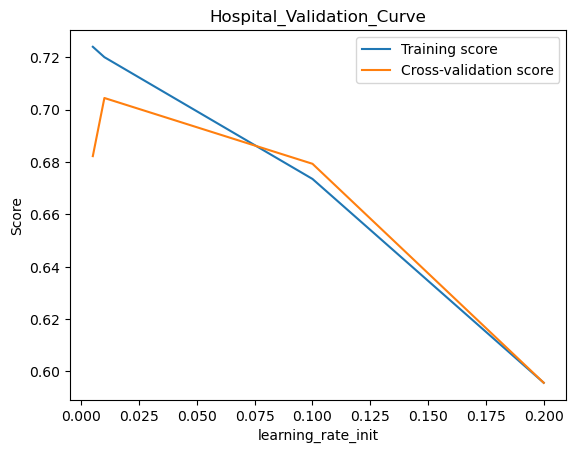

In [298]:
clf = MLPClassifier()
validation_curves(clf , 'Hospital_Validation_Curve', hospital_x, hospital_y, 5, 'learning_rate_init', 
                 [0.005, 0.01, 0.1, 0.2])

/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib

0.9866666666666667
MLPClassifier(hidden_layer_sizes=[10, 10, 10, 10], learning_rate_init=0.005)


/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib

train_score 0.9816666666666667
testing_score 0.9800000000000001
train_time 0.03634099960327149
testing_time 0.0003440380096435547


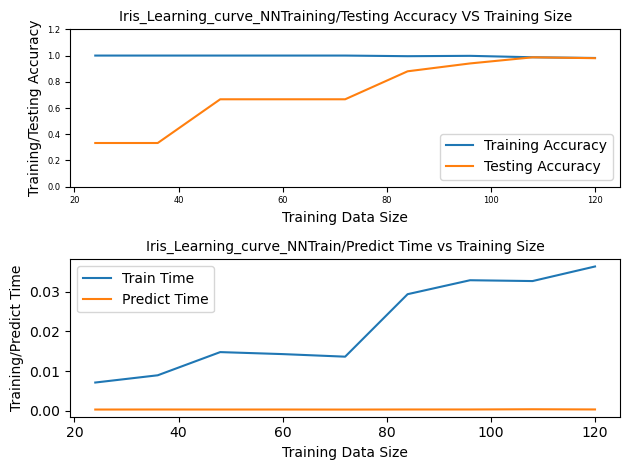

In [299]:
clf = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [[10]*3, [10]*4, [10]*5, [10]*6, [10]*7],
    'learning_rate_init': [0.005, 0.01, 0.1, 0.2]
}
grid = GridSearchCV(clf, parameters, cv=5, scoring='f1_micro', return_train_score=False)
grid.fit(iris_x, iris_y)
print(grid.best_score_)
print(grid.best_estimator_)
learning_curves(grid.best_estimator_,'Iris_Learning_curve_NN', iris_x, iris_y, cv=5)

In [300]:
print(grid.best_estimator_)

MLPClassifier(hidden_layer_sizes=[10, 10, 10, 10], learning_rate_init=0.005)


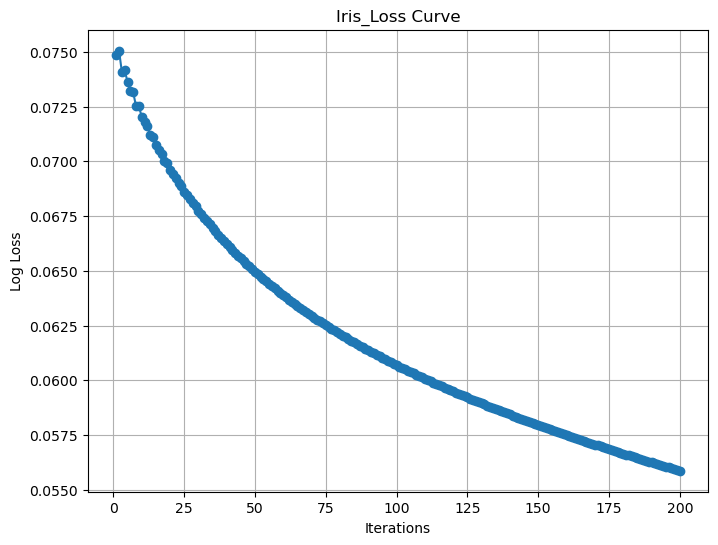

In [195]:
X_train, X_test, y_train, y_test = train_test_split(iris_x, iris_y, test_size=0.2, random_state=42)
# Initialize MLPClassifier and specify hidden layers
mlp = grid.best_estimator_

# Initialize an empty list to collect loss values
loss_values = []
# Train the model and collect loss values at each iteration
for i in range(mlp.max_iter):
    mlp.partial_fit(X_train, y_train, classes=np.unique(iris_y))
    y_pred_prob = mlp.predict_proba(X_train)  # Get class probabilities
    loss = log_loss(y_train, y_pred_prob)  # Calculate log loss
    loss_values.append(loss)

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, mlp.max_iter + 1), loss_values, marker='o')
plt.title('Iris_Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.grid(True)
plt.show()

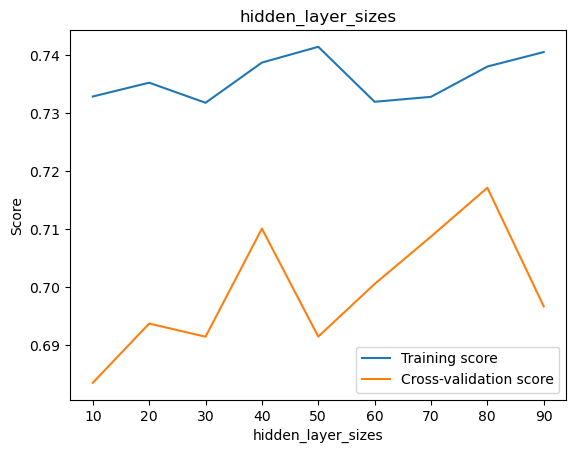

In [177]:
clf = MLPClassifier()
validation_curves(clf , 'hidden_layer_sizes', hospital_x, hospital_y, 5, 'hidden_layer_sizes', 
                 range(10, 100, 10))

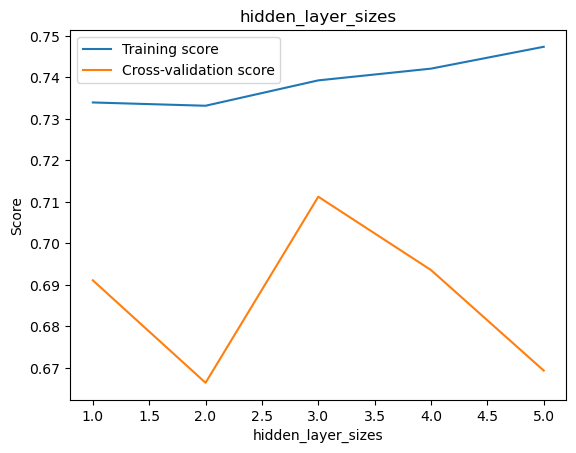

In [175]:
clf = MLPClassifier()
validation_curves(clf , 'hidden_layer_sizes', hospital_x, hospital_y, 5, 'hidden_layer_sizes', 
                 [[10],[10, 10], [10]*3, [10]*4, [10]*5], x_axis=[1, 2, 3, 4, 5])

/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7112359175455762
MLPClassifier(hidden_layer_sizes=[10, 10, 10], learning_rate_init=0.005)
train_score 0.7414565032587135
testing_score 0.6781267735482264
train_time 0.2777696132659912
testing_time 0.0009782791137695312


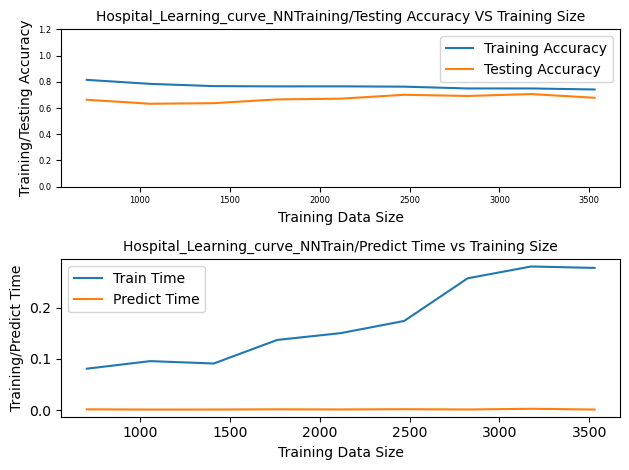

In [183]:
clf = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [[10],[10, 10], [10]*3, [10]*4],
    'learning_rate_init': [0.001, 0.005, 0.01, 0.1]
}
grid = GridSearchCV(clf, parameters, cv=5, scoring='f1_micro', return_train_score=False)
grid.fit(hospital_x, hospital_y)
print(grid.best_score_)
print(grid.best_estimator_)
learning_curves(grid.best_estimator_,'Hospital_Learning_curve_NN', hospital_x, hospital_y, cv=5)

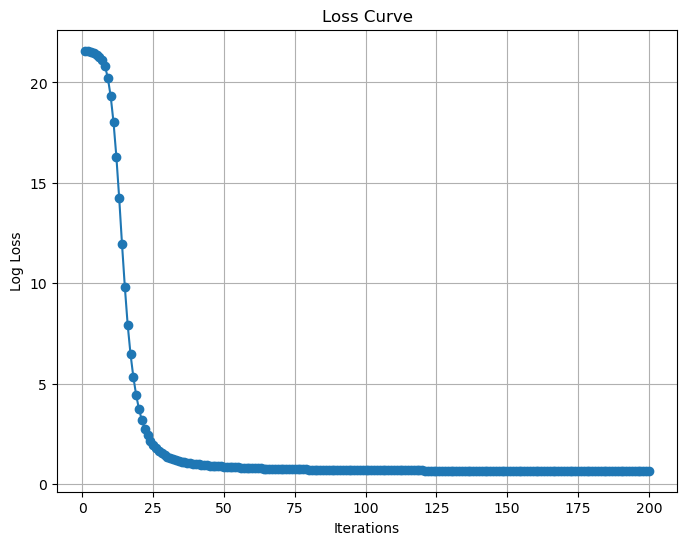

In [184]:
X_train, X_test, y_train, y_test = train_test_split(hospital_x, hospital_y, test_size=0.2, random_state=42)
mlp = MLPClassifier(alpha=0.2, hidden_layer_sizes=3)

# Initialize an empty list to collect loss values
loss_values = []
# Train the model and collect loss values at each iteration
for i in range(mlp.max_iter):
    mlp.partial_fit(X_train, y_train, classes=np.unique(hospital_y))
    y_pred_prob = mlp.predict_proba(X_train)  # Get class probabilities
    loss = log_loss(y_train, y_pred_prob)  # Calculate log loss
    loss_values.append(loss)

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, mlp.max_iter + 1), loss_values, marker='o')
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.grid(True)
plt.show()

SVM

In [198]:
for kernel in ['linear', 'poly', 'rbf']:
    svc = SVC(kernel=kernel)  
    print(kernel, ':', cross_val_score(svc, iris_x, iris_y, cv=KFold(n_splits=5), scoring='f1_micro').mean())

linear : 0.9466666666666667
poly : 0.9333333333333333
rbf : 0.8933333333333333


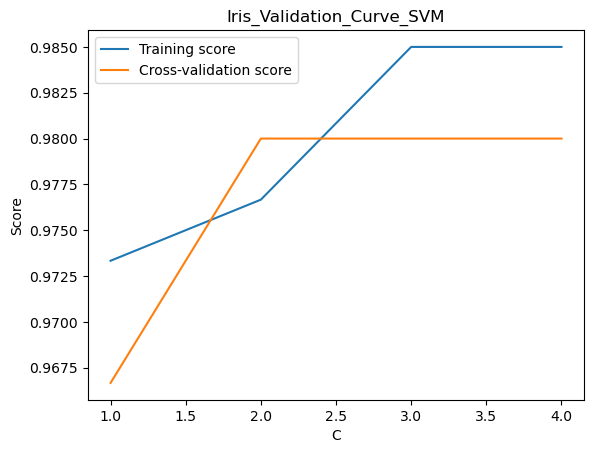

In [285]:
svc = SVC() 
validation_curves(svc, 'Iris_Validation_Curve_SVM', iris_x, iris_y, 5, 'C', 
               range(1, 5))

0.9866666666666667
SVC(C=5)
train_score 0.9816666666666667
testing_score 0.9866666666666667
train_time 0.00031032562255859373
testing_time 0.000310516357421875


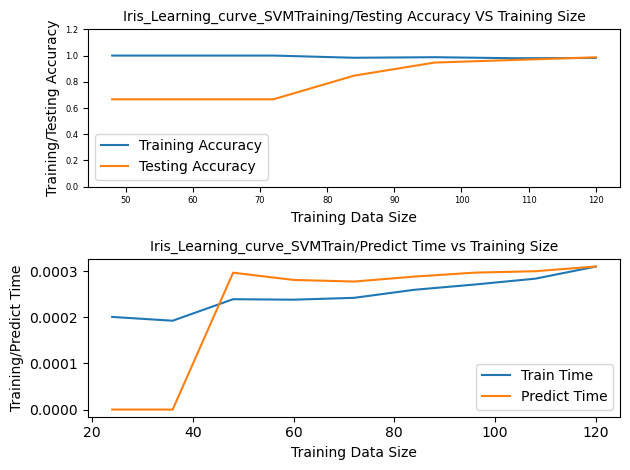

In [200]:
svc = SVC()  
parameters = {
    'C': range(1, 10),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
grid = GridSearchCV(svc, parameters, cv=5, scoring='f1_micro', return_train_score=False)
grid.fit(iris_x, iris_y)
print(grid.best_score_)
print(grid.best_estimator_)
learning_curves(grid.best_estimator_, 'Iris_Learning_curve_SVM', iris_x, iris_y, cv=5)


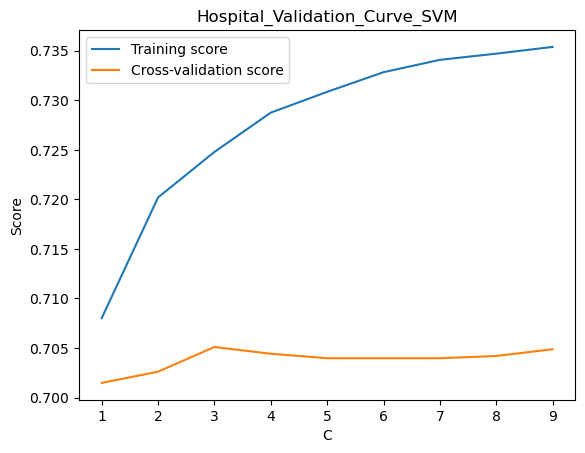

In [201]:
svc = SVC() 
validation_curves(svc, 'Hospital_Validation_Curve_SVM', hospital_x, hospital_y, 5, 'C', 
               range(1, 10))


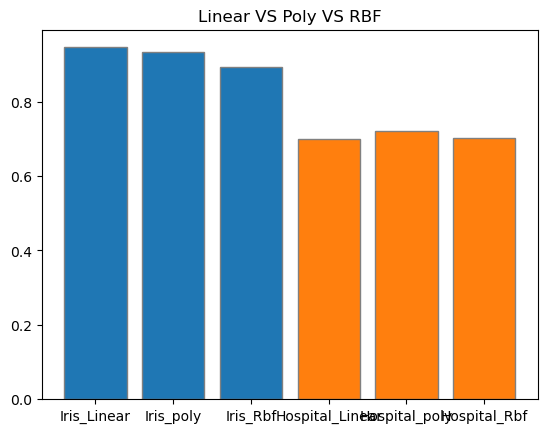

In [280]:
f1_scores = []
plt.title("Linear VS Poly VS RBF")
for w in ['linear','poly', 'rbf']:
    svc = SVC(kernel=w)  
    f1_scores.append(cross_val_score(svc, iris_x, iris_y, cv=KFold(n_splits=5), scoring='f1_micro').mean())

plt.bar(['Iris_Linear','Iris_poly', 'Iris_Rbf'], f1_scores, edgecolor ='grey', label ='Iris')
    
f1_scores = []
plt.title("Linear VS Poly VS RBF")
for w in ['linear','poly', 'rbf']:
    svc = SVC(kernel=w)  
    f1_scores.append(cross_val_score(svc, hospital_x, hospital_y, cv=KFold(n_splits=5), scoring='f1_micro').mean())



In [202]:
for kernel in ['linear', 'poly', 'rbf']:
    svc = SVC(kernel=kernel)  
    print(kernel, ':', cross_val_score(svc, hospital_x, hospital_y, cv=KFold(n_splits=5), scoring='f1_micro').mean())    

linear : 0.7005839708476823
poly : 0.7223236595506455
rbf : 0.7034999730356469


In [203]:
svc = SVC()  
parameters = {
    'C': range(1, 6),
    'kernel': ['linear', 'poly', 'rbf']
}
grid = GridSearchCV(svc, parameters, cv=5, scoring='f1_micro', return_train_score=False)
grid.fit(hospital_x, hospital_y)
print(grid.best_score_)
print(grid.best_estimator_)

0.7071417015277233
SVC(C=2, kernel='poly')


train_score 0.7340889770473222
testing_score 0.7073684588973377
train_time 0.19433560371398925
testing_time 0.023576116561889647


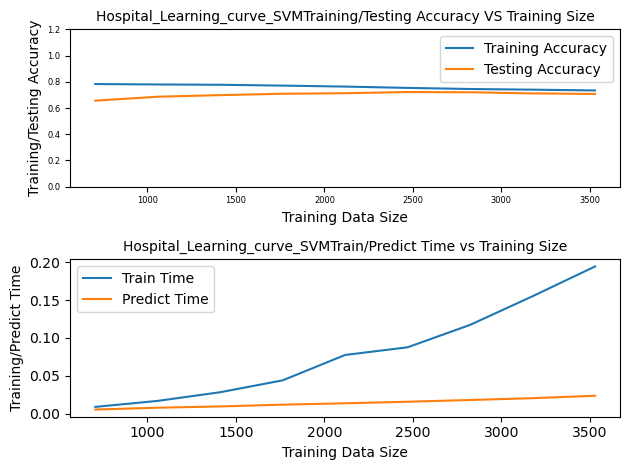

In [204]:
learning_curves(grid.best_estimator_,'Hospital_Learning_curve_SVM', hospital_x, hospital_y, cv=5)